In [1]:
from UnitlessDataGeneration import Graph, TimeSeries

Graph 140737069612944

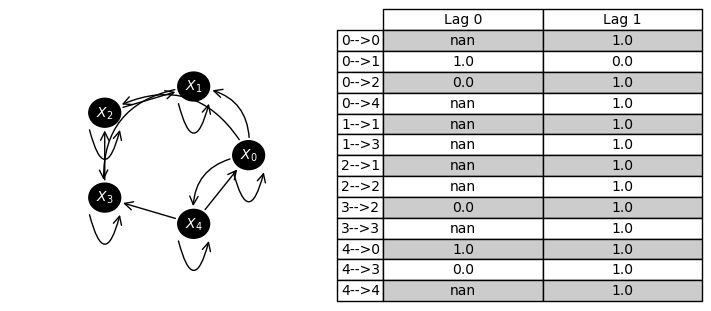

In [2]:
G = Graph(5,1,init_type='random')
G

In [3]:
G.components

[array([4, 0]), array([3, 1, 2])]

Graph 140737069612944

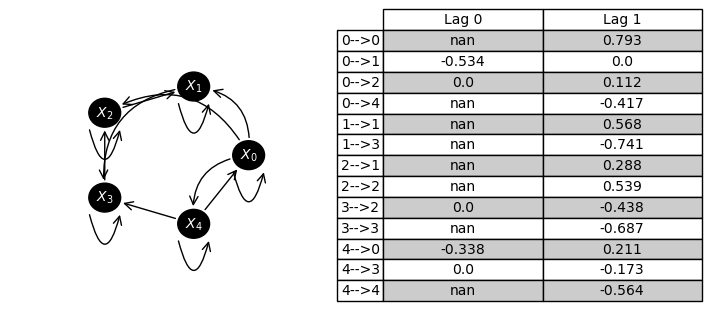

In [7]:
G = G.gen_coefficients()
G

TimeSeries 140735690187152

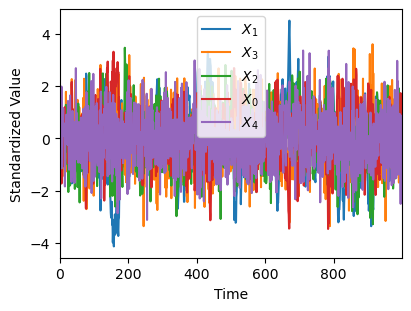

In [8]:
G.gen_data()